In [1]:
%matplotlib inline
import numpy as np
import matplotlib.pyplot as plt
plt.style.use('seaborn-white')

data = np.random.randn(1000)

(array([  3.,   3.,  33., 118., 285., 304., 184.,  57.,  11.,   2.]),
 array([-4.12675545, -3.33035193, -2.53394842, -1.7375449 , -0.94114139,
        -0.14473787,  0.65166565,  1.44806916,  2.24447268,  3.04087619,
         3.83727971]),
 <a list of 10 Patch objects>)

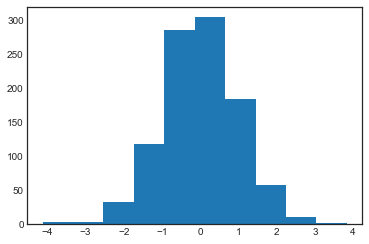

In [6]:
plt.hist(data)

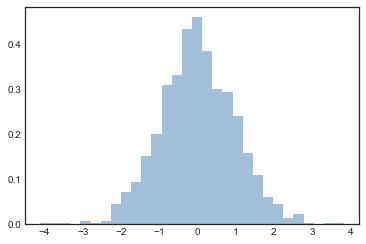

In [8]:
#a more customized histogram
plt.hist(data, bins=30, density=True, alpha=0.5,
         histtype='stepfilled', color='steelblue',
         edgecolor='none');

In [9]:
x1 = np.random.normal(0, 0.8, 1000)
x2 = np.random.normal(-2, 1, 1000)
x3 = np.random.normal(3, 2, 1000)

kwargs = dict(histtype='stepfilled', alpha=0.3, normed=True, bins=40)

plt.hist(x1, **kwargs)
plt.hist(x2, **kwargs)
plt.hist(x3, **kwargs);

In [ ]:
counts, bin_edges = np.histogram(data, bins=5)
print(counts)

In [11]:
mean = [0, 0]
cov = [[1, 1], [1, 2]]
x, y = np.random.multivariate_normal(mean, cov, 10000).T

A 2D histogram

In [ ]:
plt.hist2d(x, y, bins=30, cmap='Blues')
cb = plt.colorbar()
cb.set_label('counts in bin')

In [12]:
counts, xedges, yedges = np.histogram2d(x, y, bins=30)


In [ ]:
#Hexagonal bins
plt.hexbin(x, y, gridsize=30, cmap='Blues')
cb = plt.colorbar(label='count in bin')

Kernel Density Estimation (KDE)

In [ ]:
#KDE can be thought of as a way to "smear out" the points in space and add up the result to obtain a smooth function. 
#One extremely quick and simple KDE implementation exists in the scipy.stats package.
from scipy.stats import gaussian_kde

# fit an array of size [Ndim, Nsamples]
data = np.vstack([x, y])
kde = gaussian_kde(data)

# evaluate on a regular grid
xgrid = np.linspace(-3.5, 3.5, 40)
ygrid = np.linspace(-6, 6, 40)
Xgrid, Ygrid = np.meshgrid(xgrid, ygrid)
Z = kde.evaluate(np.vstack([Xgrid.ravel(), Ygrid.ravel()]))

# Plot the result as an image
plt.imshow(Z.reshape(Xgrid.shape),
           origin='lower', aspect='auto',
           extent=[-3.5, 3.5, -6, 6],
           cmap='Blues')
cb = plt.colorbar()
cb.set_label("density")